In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

</font> <img src="Banner2.png" width="900" height="250" align="center"/>

</font> <img src="TeamC.png" width="800" height=500 align="center"/>

# <font color=li_blue> Table of contents </font>

# <font color=purple> Sections </font>

* [1.Libaries used](#1)
* [2.Libaries used](#2)
* [3. Setup](#3)
  * [3.1 Start MariaDB](#3.1)
  * [3.2 Start Hadoop](#3.2)  
  * [3.3 Search for Spark Installation](#3.3)
  * [3.4 Create SparkSession](#3.4)
  * [3.5 Data Preparation](#3.5)
      * [3.5.1 Raw DataFrame](#3.5.1)
      * [3.5.2 DataFrame Vertices](#3.5.2)
      * [3.5.3 Countries Dataframe Vertices](#3.5.3)
      * [3.5.4 Countries Flows Dataframe](#3.5.4)
          * [3.5.4.1 Detailed Graph](#3.5.4.1)
      * [3.5.5 Country Aggregated Graph](#3.5.5)

<a id='1'></a>
# <font color=purple> 1. Libraries used </font>

In [9]:
import csv
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap,stat_summary,theme_bw
from plotnine import ggplot, aes, geom_bar, coord_flip,labs
from plotnine import *
import numpy as np
import pandas as pd
import plotnine
from plotnine import *
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')
from plotnine import *
from plotnine.data import mpg
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import animation
import matplotlib.pyplot as plt


<div class="alert alert-info" role="alert">

Adding country specific, GDP, PPP and income data from the world bank to the dataframe.  
  
</div>

In [10]:
df = pd.read_csv('madrid_transactions_country.csv', delimiter=';', skiprows=0, low_memory=False)

In [11]:
df.columns

Index(['records', 'amount', 'category', 'customer_country', 'daytime', 'hour',
       'tx_date_proc', 'weekday', 'Date_new ', 'numericcode',
       'latitude(average)', 'longitude(average)', 'country_name', 'alpha-3',
       'country_code', 'iso_3166-2', 'region', 'sub_region', 'GDP_USD_2012',
       'GDP per capita (constant 2015 US$)',
       'GDP, PPP (current international $)', 'GDP growth (annual %)',
       'Income_classification', 'PPP_2012',
       'Gross domestic income (constant LCU)',
       'Adjusted net national income per capita (constant 2015 US$)',
       'GNI per capita, PPP (current international $)'],
      dtype='object')

In [12]:
pd.set_option('display.max_columns', None)
df.head()

,records,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Date_new,numericcode,latitude(average),longitude(average),country_name,alpha-3,country_code,iso_3166-2,region,sub_region,GDP_USD_2012,GDP per capita (constant 2015 US$),"GDP, PPP (current international $)",GDP growth (annual %),Income_classification,PPP_2012,Gross domestic income (constant LCU),Adjusted net national income per capita (constant 2015 US$),"GNI per capita, PPP (current international $)"
0,1,33,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00,thursday,01.03.12 21:51,826,NaN,-2.0,United Kingdom,GBR,826,ISO 3166-2:GB,Europe,Northern Europe,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1769649482466,35265,38120
1,2,60,Fashion & Shoes,GB,Afternoon,16,2012-03-02 16:12:52+00,friday,02.03.12 16:12,826,54.0,-2.0,United Kingdom,GBR,826,ISO 3166-2:GB,Europe,Northern Europe,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1769649482466,35265,38120
2,3,50,Fashion & Shoes,CN,Evening,17,2012-03-02 17:34:01+00,friday,02.03.12 17:34,156,35.0,105.0,China,CHN,156,ISO 3166-2:CN,Asia,Eastern Asia,8532229986994,6592,1.512454e+13,7.863736,Upper middle income,3.56,..,4997,11140
3,4,6,Fashion & Shoes,GB,Evening,17,2012-03-01 17:43:29+00,thursday,01.03.12 17:43,826,54.0,-2.0,United Kingdom,GBR,826,ISO 3166-2:GB,Europe,Northern Europe,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1769649482466,35265,38120
4,5,17,Bars & restaurants,DK,Night,22,2012-03-01 22:47:52+00,thursday,01.03.12 22:47,208,56.0,10.0,Denmark,DNK,208,ISO 3166-2:DK,Europe,Northern Europe,327148943812,51567,2.505246e+11,0.226500,High income,7.56,1909813185266,42430,45820


In [13]:
df.columns

Index(['records', 'amount', 'category', 'customer_country', 'daytime', 'hour',
       'tx_date_proc', 'weekday', 'Date_new ', 'numericcode',
       'latitude(average)', 'longitude(average)', 'country_name', 'alpha-3',
       'country_code', 'iso_3166-2', 'region', 'sub_region', 'GDP_USD_2012',
       'GDP per capita (constant 2015 US$)',
       'GDP, PPP (current international $)', 'GDP growth (annual %)',
       'Income_classification', 'PPP_2012',
       'Gross domestic income (constant LCU)',
       'Adjusted net national income per capita (constant 2015 US$)',
       'GNI per capita, PPP (current international $)'],
      dtype='object')

<div class="alert alert-info" role="alert">

Statistics to see the distribution of the numeric columns  
  
</div>

In [14]:
df.describe()

,records,amount,hour,latitude(average),longitude(average),country_code,GDP_USD_2012,GDP per capita (constant 2015 US$),"GDP, PPP (current international $)",GDP growth (annual %),"GNI per capita, PPP (current international $)"
count,10793.000000,10793.000000,10793.000000,10781.000000,10782.000000,10793.000000,1.079300e+04,10793.000000,1.070600e+04,10793.000000,10793.000000
mean,5397.000000,108.789493,15.032428,36.377767,-2.871369,480.415084,4.066684e+12,34111.388770,4.411083e+12,1.678976,35716.519040
std,3115.815062,310.296894,4.809074,23.721422,67.542173,285.287340,5.548015e+12,19608.625647,5.871824e+12,2.622192,16638.373106
min,1.000000,0.000000,0.000000,-41.000000,-172.333300,0.000000,7.605496e+08,362.000000,0.000000e+00,-7.086697,0.000000
25%,2699.000000,20.000000,12.000000,35.000000,-64.000000,250.000000,4.985236e+11,12986.000000,4.697206e+11,0.313135,20620.000000
50%,5397.000000,40.000000,16.000000,42.500000,2.000000,410.000000,2.086958e+12,36183.000000,2.172384e+12,1.762223,38500.000000
75%,8095.000000,93.000000,18.000000,52.500000,25.000000,818.000000,2.719158e+12,48886.000000,3.480299e+12,2.402531,46500.000000
max,10793.000000,15000.000000,23.000000,65.000000,174.000000,882.000000,1.625397e+13,104488.000000,1.625397e+13,16.665429,132440.000000


<div class="alert alert-info" role="alert">

Heatmap shows from which countries the trasactions are coming from. Clearly, high income countries having transactions in all categories. And low income almost none and only in few categories like sports&Games, Health, Fashion & SHoes, Bar & Restaurants and Accomodation. 
  
</div>

<a id='2'></a>
# <font color=purple> 2. New Dataframes </font>

<div class="alert alert-info" role="alert">

Creating new aggregation of dataframes nfor further analysis
  
</div>

<a id='2.1'></a>
### <font color=li_blue> 2.1. Country and category </font>

In [15]:
# new df by country and category
df1 =df.groupby(['country_name', 'category','Income_classification'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
    # Apply mean of growth(should give the real growth)
    growth_GDP=('GDP growth (annual %)', 'mean'),
)

In [16]:
sales = df1.groupby(['category'])['sum_amount'].sum().reset_index()

In [17]:
df1 = df1.merge(sales, left_on='category', right_on ='category', how = 'left')

In [18]:
df1

,country_name,category,Income_classification,mean_amount,sum_amount_x,count_amount,growth_GDP,sum_amount_y
0,Algeria,Fashion & Shoes,Upper middle income,197.166667,1183,6,3.400000,494626
1,Algeria,Health,Upper middle income,217.000000,217,1,3.400000,26602
2,Andorra,Accommodation,High income,130.500000,522,4,-4.974444,282539
3,Andorra,Automocion,High income,390.000000,390,1,-4.974444,1816
4,Andorra,Bars & restaurants,High income,57.473684,2184,38,-4.974444,202031
...,...,...,...,...,...,...,...,...
612,Venezuela (Bolivarian Republic of),Personal products,Upper middle income,10.000000,20,2,5.625957,6975
613,Venezuela (Bolivarian Republic of),Sports & Games,Upper middle income,74.000000,74,1,5.625957,7923
614,Viet Nam,Fashion & Shoes,Lower middle income,648.500000,1297,2,5.500000,494626
615,Viet Nam,Health,Lower middle income,206.000000,206,1,5.500000,26602


<a id='2.2'></a>
### <font color=li_blue> 2.2. Category </font>

In [19]:
# new df by category
df3 =df.groupby(['category'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
)

In [20]:
df3

,category,mean_amount,sum_amount,count_amount
0,Accommodation,256.387477,282539,1102
1,Agencias de viajes,303.200000,1516,5
2,Automocion,302.666667,1816,6
3,Bars & restaurants,76.584913,202031,2638
4,Books & Music,226.387097,21054,93
5,Culture & Leisure,258.108696,23746,92
6,Electronics & computing,46.235294,2358,51
7,Fashion & Shoes,92.074832,494626,5372
8,Food,91.227586,13228,145
9,Health,48.455373,26602,549


<a id='2.3'></a>
### <font color=li_blue> 2.3. Create for specific country by category </font>

In [21]:
total = df3.drop(columns =['count_amount'])

In [22]:
#rename columns
total.rename(columns = {'mean_amount':'total_mean_amount'}, inplace = True)
total.rename(columns = {'sum_amount':'sum_mean_amount'}, inplace = True)
total

,category,total_mean_amount,sum_mean_amount
0,Accommodation,256.387477,282539
1,Agencias de viajes,303.200000,1516
2,Automocion,302.666667,1816
3,Bars & restaurants,76.584913,202031
4,Books & Music,226.387097,21054
5,Culture & Leisure,258.108696,23746
6,Electronics & computing,46.235294,2358
7,Fashion & Shoes,92.074832,494626
8,Food,91.227586,13228
9,Health,48.455373,26602


In [23]:
df4 =df.groupby(['country_name', 'category'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
)

In [24]:
US_sales = df4[df4["country_name"].str.contains('United States of America')]
US_sales.rename(columns = {'mean_amount':'US_mean_amount'}, inplace = True)
FR_sales = df4[df4["country_name"].str.match('France')]
FR_sales.rename(columns = {'mean_amount':'FR_mean_amount'}, inplace = True)
CN_sales = df4[df4["country_name"].str.match('China')]
CN_sales.rename(columns = {'mean_amount':'CN_mean_amount'}, inplace = True)

UK_sales = df4[df4["country_name"].str.match('United Kingdom ')]
UK_sales.rename(columns = {'mean_amount':'UK_mean_amount'}, inplace = True)

#US_sales = df1.groupby('category').filter(lambda x: (x["country_name"] == ['United States of America']).any())
#FR_sales = df1.groupby(['France'])['sum_amount'].sum().reset_index()
#CH_sales = df1.groupby(['China'])['sum_amount'].sum().reset_index()

In [25]:
US_sales 

,country_name,category,US_mean_amount
584,United States of America,Accommodation,258.661157
585,United States of America,Bars & restaurants,54.683442
586,United States of America,Books & Music,203.000000
587,United States of America,Culture & Leisure,565.416667
588,United States of America,Electronics & computing,22.400000
589,United States of America,Fashion & Shoes,59.675136
590,United States of America,Food,58.485714
591,United States of America,Health,29.160920
592,United States of America,Hogar y reformas,47.500000
593,United States of America,Other goods and services,53.333333


In [26]:
US_FR = US_sales.merge(FR_sales, left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.merge(CN_sales,left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.merge(total,left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.merge(UK_sales,left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.fillna(0)

In [27]:
US_FR

,country_name_x,category,US_mean_amount,country_name_y,FR_mean_amount,country_name_x,CN_mean_amount,total_mean_amount,sum_mean_amount,country_name_y,UK_mean_amount
0,United States of America,Accommodation,258.661157,France,215.818182,China,433.419355,256.387477,282539,United Kingdom,191.611111
1,United States of America,Bars & restaurants,54.683442,France,49.700658,China,178.819672,76.584913,202031,United Kingdom,77.127820
2,United States of America,Books & Music,203.000000,France,42.000000,0,0.000000,226.387097,21054,United Kingdom,111.000000
3,United States of America,Culture & Leisure,565.416667,France,33.000000,China,4.000000,258.108696,23746,United Kingdom,1058.500000
4,United States of America,Electronics & computing,22.400000,France,58.200000,0,0.000000,46.235294,2358,United Kingdom,113.250000
5,United States of America,Fashion & Shoes,59.675136,France,50.942188,China,250.227273,92.074832,494626,United Kingdom,59.366197
6,United States of America,Food,58.485714,France,24.562500,China,170.333333,91.227586,13228,United Kingdom,613.272727
7,United States of America,Health,29.160920,France,58.250000,China,101.000000,48.455373,26602,United Kingdom,66.184211
8,United States of America,Hogar y reformas,47.500000,France,72.928571,China,14.000000,58.900000,4712,United Kingdom,66.000000
9,United States of America,Other goods and services,53.333333,France,112.840909,China,254.250000,132.049774,29183,United Kingdom,129.360000


In [28]:
df1 = df1.merge(sales, left_on='category', right_on ='category', how = 'left')

In [29]:
df1

,country_name,category,Income_classification,mean_amount,sum_amount_x,count_amount,growth_GDP,sum_amount_y,sum_amount
0,Algeria,Fashion & Shoes,Upper middle income,197.166667,1183,6,3.400000,494626,494626
1,Algeria,Health,Upper middle income,217.000000,217,1,3.400000,26602,26602
2,Andorra,Accommodation,High income,130.500000,522,4,-4.974444,282539,282539
3,Andorra,Automocion,High income,390.000000,390,1,-4.974444,1816,1816
4,Andorra,Bars & restaurants,High income,57.473684,2184,38,-4.974444,202031,202031
...,...,...,...,...,...,...,...,...,...
612,Venezuela (Bolivarian Republic of),Personal products,Upper middle income,10.000000,20,2,5.625957,6975,6975
613,Venezuela (Bolivarian Republic of),Sports & Games,Upper middle income,74.000000,74,1,5.625957,7923,7923
614,Viet Nam,Fashion & Shoes,Lower middle income,648.500000,1297,2,5.500000,494626,494626
615,Viet Nam,Health,Lower middle income,206.000000,206,1,5.500000,26602,26602


In [30]:
df1['market_share_ctry'] = (df1['sum_amount_x']/df1['sum_amount_y'])

In [31]:
df1

,country_name,category,Income_classification,mean_amount,sum_amount_x,count_amount,growth_GDP,sum_amount_y,sum_amount,market_share_ctry
0,Algeria,Fashion & Shoes,Upper middle income,197.166667,1183,6,3.400000,494626,494626,0.002392
1,Algeria,Health,Upper middle income,217.000000,217,1,3.400000,26602,26602,0.008157
2,Andorra,Accommodation,High income,130.500000,522,4,-4.974444,282539,282539,0.001848
3,Andorra,Automocion,High income,390.000000,390,1,-4.974444,1816,1816,0.214758
4,Andorra,Bars & restaurants,High income,57.473684,2184,38,-4.974444,202031,202031,0.010810
...,...,...,...,...,...,...,...,...,...,...
612,Venezuela (Bolivarian Republic of),Personal products,Upper middle income,10.000000,20,2,5.625957,6975,6975,0.002867
613,Venezuela (Bolivarian Republic of),Sports & Games,Upper middle income,74.000000,74,1,5.625957,7923,7923,0.009340
614,Viet Nam,Fashion & Shoes,Lower middle income,648.500000,1297,2,5.500000,494626,494626,0.002622
615,Viet Nam,Health,Lower middle income,206.000000,206,1,5.500000,26602,26602,0.007744


In [32]:
#df1[df1.category == ('Health')]
df1.columns

Index(['country_name', 'category', 'Income_classification', 'mean_amount',
       'sum_amount_x', 'count_amount', 'growth_GDP', 'sum_amount_y',
       'sum_amount', 'market_share_ctry'],
      dtype='object')

New column for country classification only 

In [33]:
#max market share to calculate the relative market share, metric that shows a countries position in the market compared to its main competitor.
df1['max_ms'] = df1.groupby(['category'])['market_share_ctry'].transform(max)
df1['relative_MS'] = (df1['market_share_ctry']/df1['max_ms'])

In [34]:
df1

,country_name,category,Income_classification,mean_amount,sum_amount_x,count_amount,growth_GDP,sum_amount_y,sum_amount,market_share_ctry,max_ms,relative_MS
0,Algeria,Fashion & Shoes,Upper middle income,197.166667,1183,6,3.400000,494626,494626,0.002392,0.122426,0.019536
1,Algeria,Health,Upper middle income,217.000000,217,1,3.400000,26602,26602,0.008157,0.131381,0.062089
2,Andorra,Accommodation,High income,130.500000,522,4,-4.974444,282539,282539,0.001848,0.221548,0.008339
3,Andorra,Automocion,High income,390.000000,390,1,-4.974444,1816,1816,0.214758,0.625000,0.343612
4,Andorra,Bars & restaurants,High income,57.473684,2184,38,-4.974444,202031,202031,0.010810,0.166732,0.064836
...,...,...,...,...,...,...,...,...,...,...,...,...
612,Venezuela (Bolivarian Republic of),Personal products,Upper middle income,10.000000,20,2,5.625957,6975,6975,0.002867,0.210323,0.013633
613,Venezuela (Bolivarian Republic of),Sports & Games,Upper middle income,74.000000,74,1,5.625957,7923,7923,0.009340,0.211031,0.044258
614,Viet Nam,Fashion & Shoes,Lower middle income,648.500000,1297,2,5.500000,494626,494626,0.002622,0.122426,0.021419
615,Viet Nam,Health,Lower middle income,206.000000,206,1,5.500000,26602,26602,0.007744,0.131381,0.058941


In [35]:
df2 = df.groupby(['country_name','Income_classification'],as_index=False).agg(
    # Get mean amount per column for each country
    mean_amount=('amount', 'mean'),
    # Get sum amount per column for each country
    sum_amount=('amount', sum),
    #  Get count amount per column for each country
    count_amount=('amount', 'count'),
    #  Get median amount per column for each country
    median_amount=('amount', 'median'),
    # Apply mean of growth since it is the same for each line by country (should give the real growth)
    growth_GDP=('GDP growth (annual %)', 'mean'),
    # Apply mean of GDP per capita since it is the same for each line (should give the real growth)
    GDP_per_capita = ('GDP per capita (constant 2015 US$)','mean'),
)

In [36]:
df2['log_mean_amount'] = np.log(df2['mean_amount'])

In [37]:
sales = df2['sum_amount'].sum()

In [38]:
df2['percent'] = (df2['sum_amount'] / sales) *100
df2['log_sum_amount'] = np.log(df2['sum_amount'])
df2['log_GDP_per_capita'] = (df2['GDP_per_capita'] / sales) *100
df2['relative_MS'] = df2['percent']/ df2['percent'].max()

In [39]:
df2['percent'].max()

15.693961240541151

In [40]:
df2

,country_name,Income_classification,mean_amount,sum_amount,count_amount,median_amount,growth_GDP,GDP_per_capita,log_mean_amount,percent,log_sum_amount,log_GDP_per_capita,relative_MS
0,Algeria,Upper middle income,200.000000,1400,7,110.0,3.400000,4012.0,5.298317,0.119234,7.244228,0.341690,0.007597
1,Andorra,High income,66.725490,10209,153,40.0,-4.974444,33750.0,4.200587,0.869469,9.231025,2.874383,0.055401
2,Angola,Upper middle income,353.142857,2472,7,62.0,8.540000,3128.0,5.866873,0.210533,7.812783,0.266402,0.013415
3,Argentina,Upper middle income,79.528620,23620,297,30.0,-1.026420,13896.0,4.376117,2.011642,10.069849,1.183479,0.128179
4,Armenia,Lower middle income,28.000000,28,1,28.0,7.200000,3313.0,3.332205,0.002385,3.332205,0.282158,0.000152
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Uruguay,High income,95.117647,1617,17,66.0,3.538179,14541.0,4.555115,0.137715,7.388328,1.238412,0.008775
106,Uzbekistan,Lower middle income,51.923077,675,13,40.0,7.102445,2355.0,3.949763,0.057488,6.514713,0.200568,0.003663
107,Venezuela (Bolivarian Republic of),Upper middle income,63.402299,5516,87,43.0,5.625957,12986.0,4.149500,0.469781,8.615408,1.105977,0.029934
108,Viet Nam,Lower middle income,501.000000,1503,3,222.0,5.500000,2217.0,6.216606,0.128006,7.315218,0.188815,0.008156


<a id='2.4'></a>
### <font color=li_blue> 2.4. Create for specific country by category </font>

In [41]:
madrid_transactions=pd.read_csv('madrid_transactions_country05.12.2022.csv',sep=';')
madrid_transactions['country-category']=madrid_transactions['country_name']+'-'+madrid_transactions['category']
madrid_transactions['Median Category-Country']=madrid_transactions.groupby(['category','customer_country']).amount.transform(np.median)
madrid_transactions['Median Country']=madrid_transactions.groupby(['customer_country']).amount.transform(np.median)
madrid_transactions['Median Category']=madrid_transactions.groupby(['category']).amount.transform(np.median)
category_q1=madrid_transactions.groupby(['category']).amount.quantile(q=0.25)
category_q3=madrid_transactions.groupby(['category']).amount.quantile(q=0.75)
madrid_transactions=madrid_transactions.merge(category_q1,on='category',how='left',suffixes=('','cat_q1'))
madrid_transactions=madrid_transactions.merge(category_q3,on='category',how='left',suffixes=('','cat_q3'))
madrid_transactions['Cat_IQR']=madrid_transactions['amountcat_q3']-madrid_transactions['amountcat_q1']
madrid_transactions['Cat_low_IQR']=madrid_transactions['Median Category']-(1.5*madrid_transactions['Cat_IQR'])
madrid_transactions['Cat_high_IQR']=madrid_transactions['Median Category']+(1.5*madrid_transactions['Cat_IQR'])
madrid_transactions['Cat_Outliers']=np.where((madrid_transactions['amount']<madrid_transactions['Cat_low_IQR']) \
                                             |(madrid_transactions['amount']>madrid_transactions['Cat_high_IQR']),\
                                             'Outlier','')
madrid_transactions=madrid_transactions[madrid_transactions['Cat_Outliers']=='']
madrid_transactions['Median Category-Country']=madrid_transactions.groupby(['category','customer_country']).amount.transform(np.median)
madrid_transactions['Median Country']=madrid_transactions.groupby(['customer_country']).amount.transform(np.median)
madrid_transactions['Median Category']=madrid_transactions.groupby(['category']).amount.transform(np.median)
madrid_transactions['Amount_Ctry_Cat']=madrid_transactions.groupby(['category','customer_country']).amount.transform(np.sum)
df_ranking=madrid_transactions.groupby(['category','customer_country']).amount.sum().reset_index()
df_ranking['Ranking']=df_ranking.groupby(['category']).amount.rank(method="first", ascending=False)
madrid_transactions=madrid_transactions.merge(df_ranking,on=['category','customer_country'],how='left',suffixes=('','rnk'))
madrid_transactions['country_rnk']=madrid_transactions['Ranking'].astype(int).astype(str).str.zfill(2)+'.'+madrid_transactions['country_name']

In [42]:
madrid_transactions

,Unnamed: 0,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Date_new,numericcode,latitude(average),longitude(average),country_name,alpha-3,country_code,iso_3166-2,region,sub_region,GDP_USD_2012,GDP per capita (constant 2015 US$),"GDP, PPP (current international $)",GDP growth (annual %),Income_classification1,PPP_2012,Gross domestic income (constant LCU),Adjusted net national income per capita (constant 2015 US$),Income_classification,"GNI per capita, PPP (current international $)",country-category,Median Category-Country,Median Country,Median Category,amountcat_q1,amountcat_q3,Cat_IQR,Cat_low_IQR,Cat_high_IQR,Cat_Outliers,Amount_Ctry_Cat,amountrnk,Ranking,country_rnk
0,1,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00,thursday,01.03.12 21:51,826,NaN,-2.0,United Kingdom,GBR,826,ISO 3166-2:GB,Europe,Northern Europe,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1769649482466,35265,High income,38120,United Kingdom -Fashion & Shoes,32.900,35.00,35.99,22.965,83.9600,60.9950,-48.64250,134.34250,,10817.71,10817.71,4.0,04.United Kingdom
1,2,59.97,Fashion & Shoes,GB,Afternoon,16,2012-03-02 16:12:52+00,friday,02.03.12 16:12,826,54.0,-2.0,United Kingdom,GBR,826,ISO 3166-2:GB,Europe,Northern Europe,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1769649482466,35265,High income,38120,United Kingdom -Fashion & Shoes,32.900,35.00,35.99,22.965,83.9600,60.9950,-48.64250,134.34250,,10817.71,10817.71,4.0,04.United Kingdom
2,3,49.99,Fashion & Shoes,CN,Evening,17,2012-03-02 17:34:01+00,friday,02.03.12 17:34,156,35.0,105.0,China,CHN,156,ISO 3166-2:CN,Asia,Eastern Asia,8532229986994,6592,1.512454e+13,7.863736,Upper middle income,3.56,..,4997,Upper middle income,11140,China-Fashion & Shoes,45.830,39.95,35.99,22.965,83.9600,60.9950,-48.64250,134.34250,,8125.40,8125.40,5.0,05.China
3,4,5.95,Fashion & Shoes,GB,Evening,17,2012-03-01 17:43:29+00,thursday,01.03.12 17:43,826,54.0,-2.0,United Kingdom,GBR,826,ISO 3166-2:GB,Europe,Northern Europe,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1769649482466,35265,High income,38120,United Kingdom -Fashion & Shoes,32.900,35.00,35.99,22.965,83.9600,60.9950,-48.64250,134.34250,,10817.71,10817.71,4.0,04.United Kingdom
4,5,16.65,Bars & restaurants,DK,Night,22,2012-03-01 22:47:52+00,thursday,01.03.12 22:47,208,56.0,10.0,Denmark,DNK,208,ISO 3166-2:DK,Europe,Northern Europe,327148943812,51567,2.505246e+11,0.226500,High income,7.56,1909813185266,42430,High income,45820,Denmark-Bars & restaurants,17.825,32.27,26.00,13.750,77.4725,63.7225,-62.58375,128.58375,,1271.08,1271.08,18.0,18.Denmark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9228,10786,100.00,Other goods and services,GB,Evening,19,2012-03-02 19:12:49+00,friday,02.03.12 19:12,826,54.0,-2.0,United Kingdom,GBR,826,ISO 3166-2:GB,Europe,Northern Europe,2719158341006,43100,2.453352e+12,1.469888,High income,0.70,1’769’649’482’466,35’264.9,High income,38120,United Kingdom -Other goods and services,85.000,35.00,61.00,30.000,158.1500,128.1500,-122.22500,262.22500,,2590.50,2590.50,2.0,02.United Kingdom
9229,10787,19.10,Bars & restaurants,FR,Evening,19,2012-03-02 19:22:27+00,friday,02.03.12 19:22,250,46.0,2.0,France,FRA,250,ISO 3166-2:FR,Europe,Western Europe,2683671716967,36183,2.474004e+12,0.313135,High income,0.84,2’108’515’706’873,29’897.3,High income,38500,France-Bars & restaurants,28.350,30.92,26.00,13.750,77.4725,63.7225,-62.58375,128.58375,,10448.99,10448.99,2.0,02.France
9230,10789,79.33,Bars & restaurants,IN,Night,21,2012-03-02 21:22:51+00,friday,02.03.12 21:22,356,20.0,77.0,India,IND,356,ISO 3166-2:IN,Asia,Southern Asia,1827637859136,1347,6.153155e+12,5.456389,Lower middle income,16.16,91’828’791’047’624,1’180.4,Lower middle income,4800,India-Bars & restaurants,16.900,29.90,26.00,13.750,77.4725,63.7225,-62.58375,128.58375,,631.15,631.15,25.0,25.India
9231,10790,77.70,Bars & re

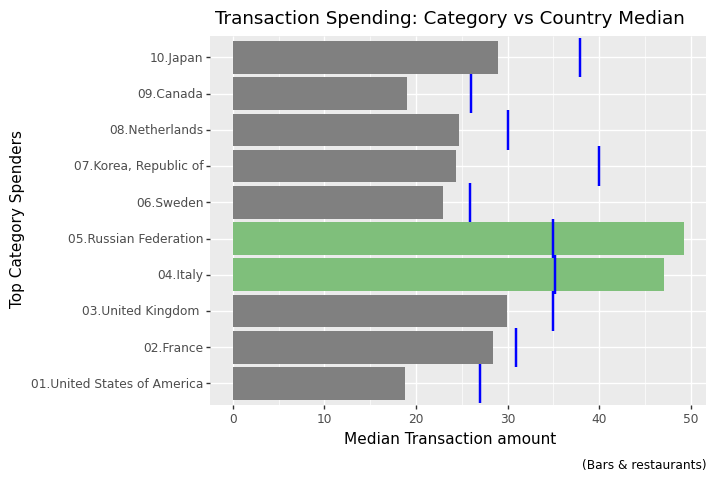

<ggplot: (8779184230132)>

In [45]:
Category='Bars & restaurants'
Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
[['category','customer_country','country_rnk','Median Category-Country','Median Country','Amount_Ctry_Cat']].drop_duplicates() \
.sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_rnk',ascending=True)
Transaction_value.reset_index(drop=True,inplace=True)
Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'#7fbf7b','grey')
Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')

ggplot(Transaction_value) +  geom_col(aes('country_rnk','Median Category-Country'),fill=Transaction_value['color']) + \
geom_point(aes('country_rnk',"Median Country"),color='blue',shape='|',size=15,stroke=1) \
+ xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
+ geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
+ geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y=100)\
+ coord_flip() \
+ labs(caption =  "("+Category+")")



In [74]:
import matplotlib.pyplot as plt
import plotnine as p9
import pandas as pd
import numpy as np
from copy import copy
from ipywidgets import widgets
from IPython.display import display

from plotnine.data import mtcars

In [75]:
#pip install ipywidgets

In [76]:
# Prepre the list we will use to selec sub-sets of data based on number of cylinders.
List = np.unique(madrid_transactions['category'] )

In [77]:
type(list(List))

list

In [78]:


cylSelect = widgets.Dropdown(
    options=list(List),
    value=List[1],
    description='Category:',
    disabled=False,
)

# For the widgets to update the same plot, instead of creating one new image every time
# a selection changes. We keep track of the matplotlib image and axis, so we create only one
# figure and set of axis, for the first plot, and then just re-use the figure and axis
# with plotnine's "_draw_using_figure" function.
fig = None
axs = None

In [79]:
Category = cylSelect.value
Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
[['category','customer_country','country_rnk','Median Category-Country','Median Country','Amount_Ctry_Cat']].drop_duplicates() \
.sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_rnk',ascending=True)
Transaction_value.reset_index(drop=True,inplace=True)
Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'#7fbf7b','grey')
Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')


# This has to be used the first time you make a plot. This magic allows the notebook to update plots.
%matplotlib notebook

p = ggplot(Transaction_value) +  geom_col(aes('country_rnk','Median Category-Country'),fill=Transaction_value['color']) + \
    geom_point(aes('country_rnk',"Median Country"),color='#1c9099',shape='|',size=15,stroke=1) \
    + xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
    + geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
    + geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y=10)\
    + coord_flip() \
    + labs(caption =  "("+Category+")") + theme_classic()

def transactions_by_category(*args):
    # Use global variables for matplotlib's figure and axis.
    global fig, axs

    Category = cylSelect.value
    Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
    [['category','customer_country','country_rnk','Median Category-Country','Median Country','Amount_Ctry_Cat']].drop_duplicates() \
    .sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_rnk',ascending=True)
    Transaction_value.reset_index(drop=True,inplace=True)
    Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'#7fbf7b','grey')
    Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')
    p = ggplot(Transaction_value) +  geom_col(aes('country_rnk','Median Category-Country'),fill=Transaction_value['color']) + \
    geom_point(aes('country_rnk',"Median Country"),color='#1c9099',shape='|',size=15,stroke=1) \
    + xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
    + geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
    + geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y=10)\
    + coord_flip() \
    + labs(caption =  "("+Category+")") + theme_classic()

    if fig is None:
        # If this is the first time a plot is made in the notebook, we let plotnine create a new
        # matplotlib figure and axis.
        fig, plot = p.draw(return_ggplot=True)
        axs = plot.axs
    else:

        #p = copy(p)
        # This helps keeping old selected data from being visualized after a new selection is made.
        # We delete all previously reated artists from the matplotlib axis.
        for artist in plt.gca().lines +\
                        plt.gca().collections +\
                        plt.gca().artists + plt.gca().patches + plt.gca().texts:
            artist.remove()

        # If a plot is being updated, we re-use the figure an axis created before.
        p._draw_using_figure(fig, axs)

Dropdown(description='Category:', index=1, options=('Accommodation', 'Agencias de viajes', 'Automocion', 'Bars…

<IPython.core.display.Javascript object>


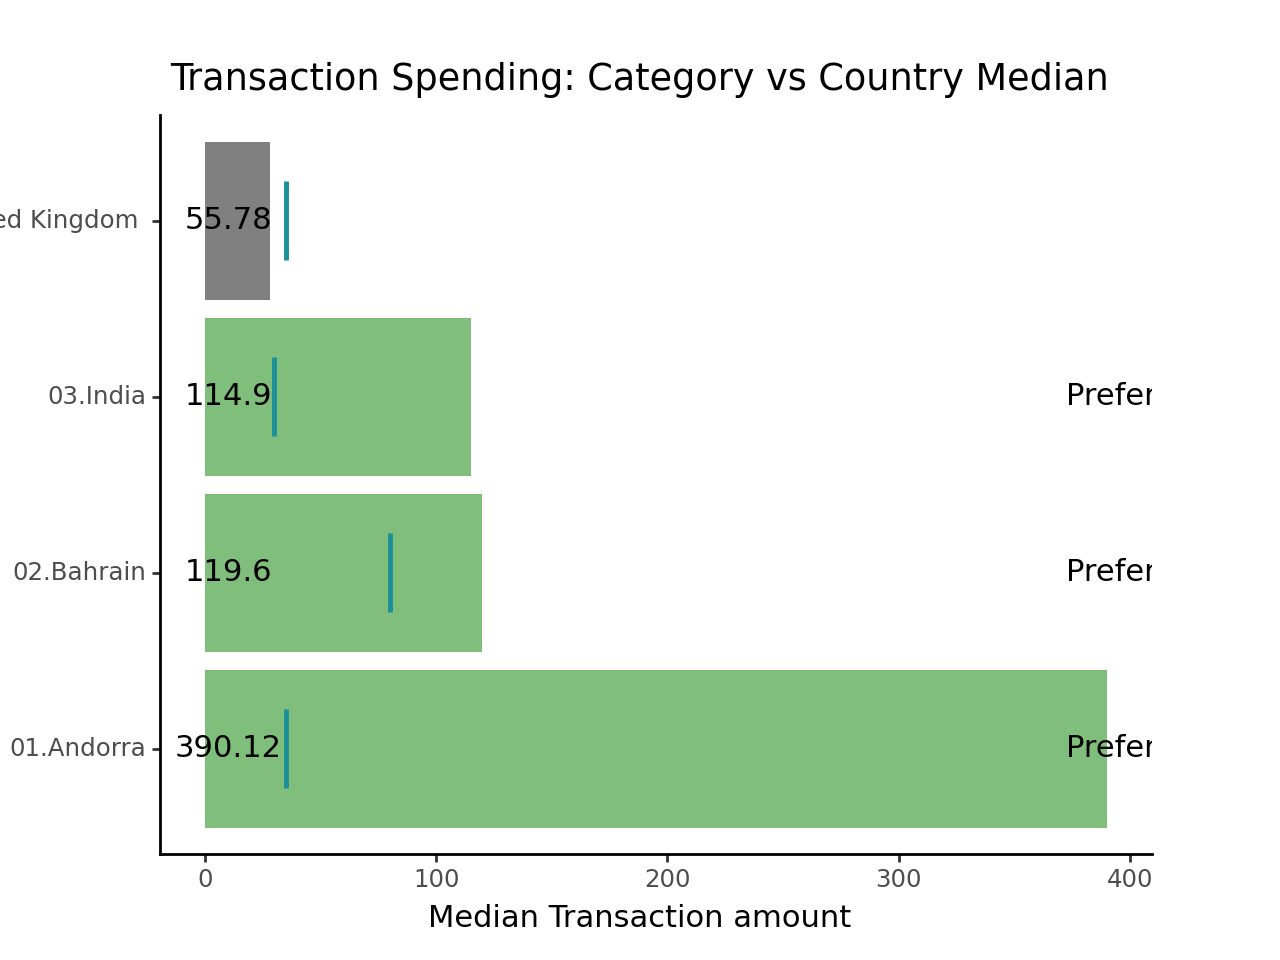

In [80]:
cylSelect.observe(transactions_by_category, 'value')

# Display the widgets
display(cylSelect)


# Plots the first image, with inintial values.
transactions_by_category()

In [ ]:
Category='Automocion'
Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
[['category','customer_country','country_rnk','Median Category-Country','Median Country','Amount_Ctry_Cat']].drop_duplicates() \
.sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_rnk',ascending=True)
Transaction_value.reset_index(drop=True,inplace=True)
Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'green','grey')
Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')

ggplot(Transaction_value) +  geom_col(aes('country_rnk','Median Category-Country'),fill=Transaction_value['color']) + \
geom_point(aes('country_rnk',"Median Country"),color='blue',shape='|',size=15,stroke=1) \
+ xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
+ geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
+ geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y=100)\
+ coord_flip() \
+ labs(caption =  "("+Category+")")

In [81]:
Transaction_value

,category,customer_country,country_rnk,Median Category-Country,Median Country,Amount_Ctry_Cat,color,preference
0,Agencias de viajes,FR,01.France,90.555,30.92,181.11,#7fbf7b,Prefered
1,Agencias de viajes,NO,02.Norway,66.000,39.99,66.00,#7fbf7b,Prefered
2,Agencias de viajes,IT,03.Italy,37.410,35.14,37.41,#7fbf7b,Prefered


In [82]:
label_df=Transaction_value[['customer_country','Median Category-Country']]
label_df['Median Category-Country']=label_df['Median Category-Country']
label_df['label']='n='+label_df['Median Category-Country'].astype('str')
label_df

,customer_country,Median Category-Country,label
0,FR,90.555,n=90.555
1,NO,66.000,n=66.0
2,IT,37.410,n=37.41


In [83]:
label_df=Transaction_value[['customer_country','Median Category-Country']].groupby(['customer_country']).count().reset_index()
label_df['label']='n='+label_df['Median Category-Country'].astype('str')
label_df



,customer_country,Median Category-Country,label
0,FR,1,n=1
1,IT,1,n=1
2,NO,1,n=1


### Animations: Bar Races

### Top Country Spenders by the hour

<IPython.core.display.Javascript object>


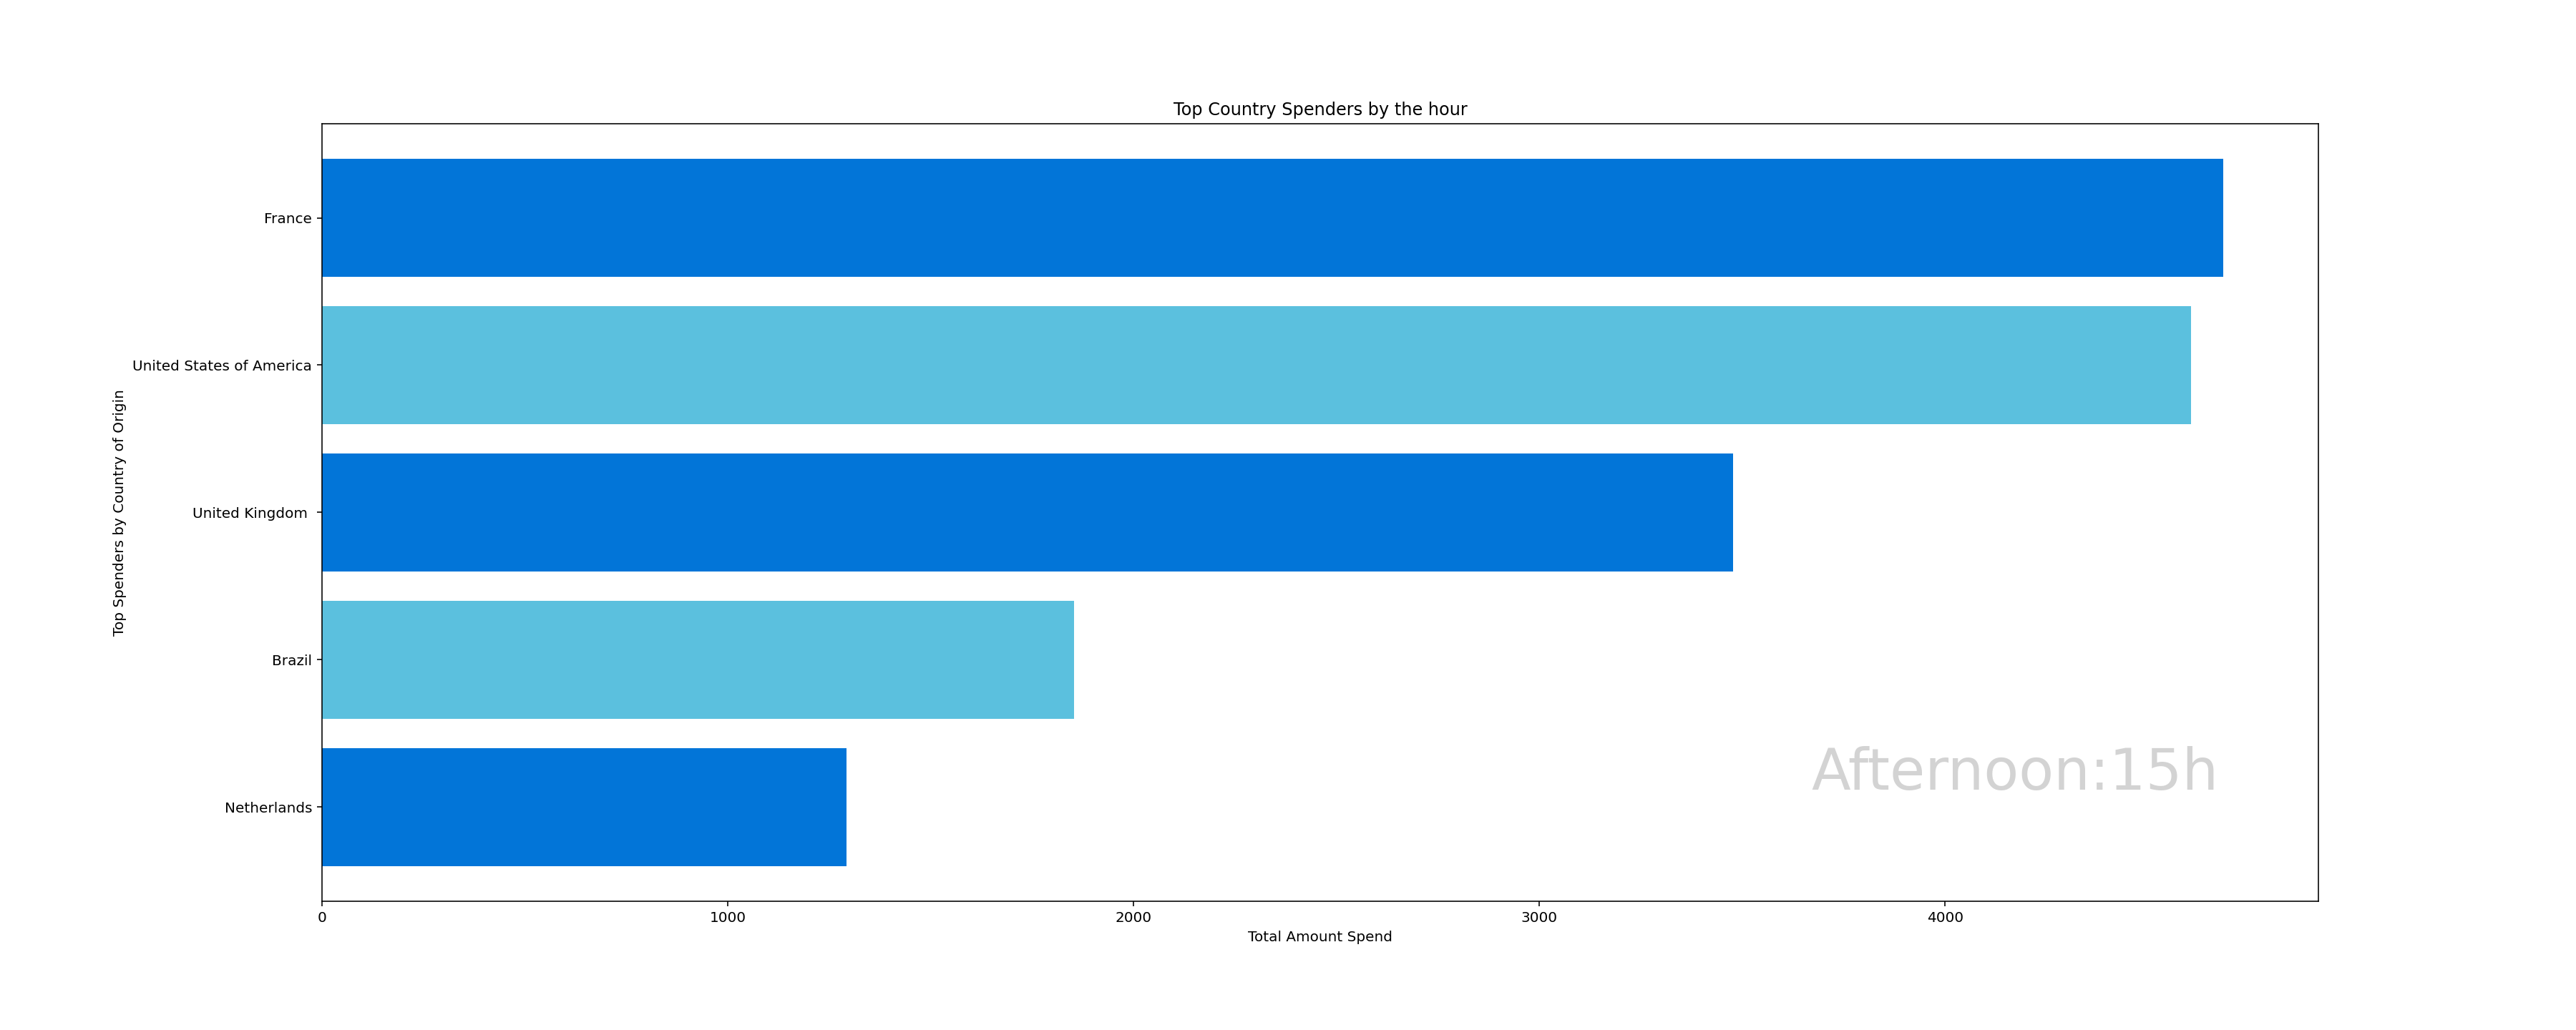

MovieWriter ffmpeg unavailable; using Pillow instead.


In [84]:
transaction_per_hour=madrid_transactions.groupby (['hour','customer_country','country_name','region'])['amount'].sum()
transaction_per_hour=transaction_per_hour.reset_index()

barchartrace_data  =transaction_per_hour.copy()
n_observations = 5
n_frames_between_states = 30

barchartrace_data= barchartrace_data.pivot('hour', ['customer_country','country_name'], 'amount')
barchartrace_data['hour'] = barchartrace_data.index

barchartrace_data.reset_index(drop = True, inplace = True)
barchartrace_data.index = barchartrace_data.index * n_frames_between_states
barchartrace_data =  barchartrace_data.reindex(range(barchartrace_data.index.max()+1))

barchartrace_data = barchartrace_data.interpolate()
barchartrace_data = barchartrace_data.melt(id_vars='hour', var_name =['customer_country','country_name'], value_name  = 'amount')



import math

n_observations = 5
fig, ax = plt.subplots(figsize=(25, 10))

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

hours = barchartrace_data['hour'].unique()

label = ax.text(0.95, 0.20, hours[0],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
continent = transaction_per_hour[['customer_country','region']].drop_duplicates().reset_index(drop = True)

# # 2. Add continent info
barchartrace_data = barchartrace_data.merge(continent,left_on = 'customer_country', right_on = 'customer_country')
conditions = [
          barchartrace_data['region'] == 'Europe',
          barchartrace_data['region'] == 'Asia',
          barchartrace_data['region'] == 'Americas',
          barchartrace_data['region'] == 'Oceania',
          barchartrace_data['region'] == 'Africa',
 ]

values = ['#0275d8', '#5cb85c', '#5bc0de', '#f0ad4e', '#d9534f']

barchartrace_data['color'] = np.select(conditions, values)

df_daytime = madrid_transactions[['hour','daytime']].drop_duplicates().reset_index(drop = True).sort_values(by='hour')

barchartrace_data = barchartrace_data.merge(df_daytime,left_on = 'hour', right_on = 'hour',how='left')

def update_barchart_race(i):

    hour = hours[i]

    data_temp = barchartrace_data.loc[barchartrace_data['hour'] == hour, :]

    v_datetime =  barchartrace_data.loc[barchartrace_data['hour'] == math.floor(hour), :]['daytime'].unique().item()

    # Create rank and get first 10 countries
    data_temp['ranking'] = data_temp['amount'].rank(method = 'first',ascending = False)
    data_temp = data_temp.loc[data_temp['ranking'] <= n_observations]

    ax.clear()
    ax.barh(y = data_temp['ranking'] ,
            width = data_temp.amount, 
            tick_label=data_temp['country_name'],
#            ,color=colors)
            color=data_temp['color'])

    label = ax.text(0.95, 0.20, str(v_datetime)+':'+str(math.floor(hour))+'h',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    plt.ylabel("Top Spenders by Country of Origin")
    plt.xlabel("Total Amount Spend")
    plt.title("Top Country Spenders by the hour")

    ax.set_ylim(ax.get_ylim()[::-1]) # Revert axis



anim = animation.FuncAnimation(fig, update_barchart_race, frames = len(hours), )
anim.save('barchart_race_Countries_notransition.gif', fps=10)  

In [ ]:
### Top Category-Country Spenders by the hour

In [ ]:
import textwrap

    
transaction_per_hour=madrid_transactions.groupby (['hour','customer_country','country-category','region'])['amount'].sum()
transaction_per_hour=transaction_per_hour.reset_index()
barchartrace_data  =transaction_per_hour.copy()
n_observations = 5
n_frames_between_states = 30

barchartrace_data= barchartrace_data.pivot('hour', ['customer_country','country-category'], 'amount')
barchartrace_data['hour'] = barchartrace_data.index
barchartrace_data.reset_index(drop = True, inplace = True)
barchartrace_data.index = barchartrace_data.index * n_frames_between_states
barchartrace_data =  barchartrace_data.reindex(range(barchartrace_data.index.max()+1))
barchartrace_data = barchartrace_data.interpolate()
barchartrace_data = barchartrace_data.melt(id_vars='hour', var_name =['customer_country','country-category'], value_name  = 'amount')



import math

n_observations = 5
fig, ax = plt.subplots(figsize=(25, 10))

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

hours = barchartrace_data['hour'].unique()

label = ax.text(0.95, 0.20, hours[0],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
continent = transaction_per_hour[['customer_country','region']].drop_duplicates().reset_index(drop = True)

# # 2. Add continent info
barchartrace_data = barchartrace_data.merge(continent,left_on = 'customer_country', right_on = 'customer_country')
conditions = [
          barchartrace_data['region'] == 'Europe',
          barchartrace_data['region'] == 'Asia',
          barchartrace_data['region'] == 'Americas',
          barchartrace_data['region'] == 'Oceania',
          barchartrace_data['region'] == 'Africa',
 ]

values = ['#0275d8', '#5cb85c', '#5bc0de', '#f0ad4e', '#d9534f']

barchartrace_data['color'] = np.select(conditions, values)

df_daytime = madrid_transactions[['hour','daytime']].drop_duplicates().reset_index(drop = True).sort_values(by='hour')

barchartrace_data = barchartrace_data.merge(df_daytime,left_on = 'hour', right_on = 'hour',how='left')

def update_barchart_race(i):

    hour = hours[i]

    data_temp = barchartrace_data.loc[barchartrace_data['hour'] == hour, :]

    v_datetime =  barchartrace_data.loc[barchartrace_data['hour'] == math.floor(hour), :]['daytime'].unique().item()

    # Create rank and get first 10 countries
    data_temp['ranking'] = data_temp['amount'].rank(method = 'first',ascending = False)
    data_temp = data_temp.loc[data_temp['ranking'] <= n_observations]

    ax.clear()
    ax.barh(y = data_temp['ranking'] ,
            width = data_temp.amount, 
            tick_label= data_temp['country-category'] ,
#            ,color=colors)
            color=data_temp['color'])

    label = ax.text(0.95, 0.20, str(v_datetime)+':'+str(math.floor(hour))+'h',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    plt.ylabel("Top Spenders by Country of Origin & Category ")
    plt.xlabel("Total Amount Spend")
    plt.title("Top expenditures by the hour")

    ax.set_ylim(ax.get_ylim()[::-1]) # Revert axis



anim = animation.FuncAnimation(fig, update_barchart_race, frames = len(hours), )
anim.save('barchart_race_Category_Countries_notransition.gif', fps=10)  

### Top Categories by the hour

In [ ]:
transaction_per_hour_cat=madrid_transactions.groupby (['hour','category'])['amount'].sum()
transaction_per_hour_cat=transaction_per_hour_cat.reset_index()
barchartrace_data  =transaction_per_hour_cat.copy()
n_observations = 5
n_frames_between_states = 30

barchartrace_data= barchartrace_data.pivot('hour', 'category', 'amount')
barchartrace_data['hour'] = barchartrace_data.index

barchartrace_data.reset_index(drop = True, inplace = True)
barchartrace_data.index = barchartrace_data.index * n_frames_between_states
barchartrace_data =  barchartrace_data.reindex(range(barchartrace_data.index.max()+1))

barchartrace_data = barchartrace_data.interpolate()
barchartrace_data = barchartrace_data.melt(id_vars='hour', var_name ='category', value_name  = 'amount')

import math

n_observations = 5
fig, ax = plt.subplots(figsize=(25, 10))

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

hours = barchartrace_data['hour'].unique()


df_daytime = madrid_transactions[['hour','daytime']].drop_duplicates().reset_index(drop = True).sort_values(by='hour')

barchartrace_data = barchartrace_data.merge(df_daytime,left_on = 'hour', right_on = 'hour',how='left')

def update_barchart_race(i):

    hour = hours[i]

    data_temp = barchartrace_data.loc[barchartrace_data['hour'] == hour, :]

    v_datetime =  barchartrace_data.loc[barchartrace_data['hour'] == math.floor(hour), :]['daytime'].unique().item()

    # Create rank and get first 10 countries
    data_temp['ranking'] = data_temp['amount'].rank(method = 'first',ascending = False)
    data_temp = data_temp.loc[data_temp['ranking'] <= n_observations]

    ax.clear()
    ax.barh(y = data_temp['ranking'] ,
            width = data_temp.amount, 
            tick_label= data_temp['category'] )
#            ,color=colors)
#             color=data_temp['color'])

    label = ax.text(0.95, 0.20, str(v_datetime)+':'+str(math.floor(hour))+'h',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    plt.ylabel("Top Spenders by Categories of Origin & Category ")
    plt.xlabel("Total Amount Spend")
    plt.title("Top Categories by the hour")

    ax.set_ylim(ax.get_ylim()[::-1]) # Revert axis



anim = animation.FuncAnimation(fig, update_barchart_race, frames = len(hours), )
anim.save('barchart_race_Category_notransition.gif', fps=10)  

In [ ]:
df2.columns

In [ ]:
import plotly.express as px
import pandas as pd

fig = px.line_polar(df3, r='mean_amount', theta='category', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=US_FR['US_mean_amount'],
      theta=US_FR['category'],
      fill='toself',
      name='USA'
))

#fig.add_trace(go.Scatterpolar(
#      r=US_FR['CN_mean_amount'],
#      theta=US_FR['category'],
#      fill='toself',
#      name='China'
#))

fig.add_trace(go.Scatterpolar(
      r=US_FR['total_mean_amount'],
      theta=US_FR['category'],
      fill='toself',
      name='Total'
))

fig.add_trace(go.Scatterpolar(
      r=US_FR['UK_mean_amount'],
      theta=US_FR['category'],
      fill='toself',
      name='Uk'
))

fig.show()

### <font color=red> GGPLOT </font>

In [ ]:
# Heatmap 
ggplot(df, aes( "Income_classification","category", fill= "amount")) + \
geom_tile() 
#+ plotnine.theme(axis_text_x = plotnine.element_text(angle=90))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z= df["amount"],
                   x=df['Income_classification'],
                   y=df["category"],
                   hoverongaps = False))
fig.show()

In [ ]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
cat_list = df['category'].value_counts().index.tolist()
df_cat = pd.Categorical(df['category'], categories=cat_list)

# assign to a new column in the DataFrame
df5 = df.assign(df_cat = df_cat)

(ggplot(df5)
 + aes(x='df_cat')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='category', title='Number of categories')
)

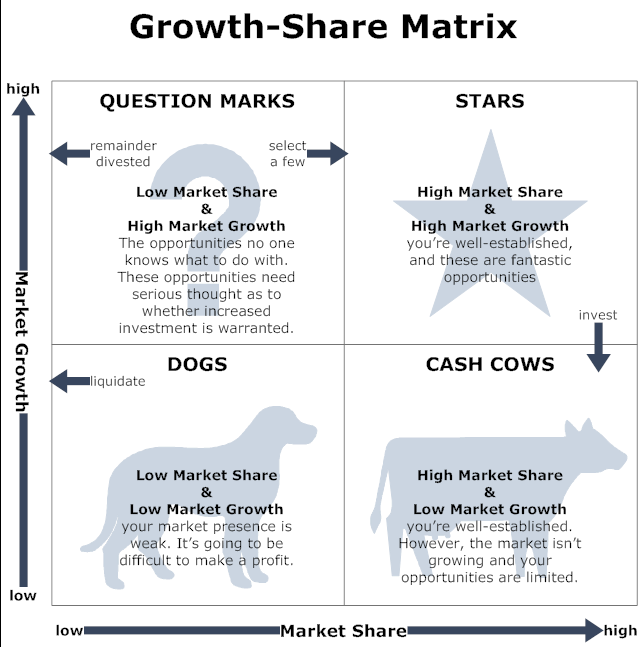

In [ ]:
data = px.scatter(df2, x="relative_MS", y='growth_GDP',size='count_amount', color='Income_classification', hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='Relative of Purchases, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP Growth, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-10,10], 
    title='BCG Matrix Countries Growth vs Market Share',
    yaxis=dict(title='GDP Growth, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[-0,1.05],
    xaxis=dict(title='Relative Market Share of Purchases, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=0,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=0.5, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=4
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=12
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=12
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=4
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

In [ ]:
data = px.scatter(df2, x="log_sum_amount", y='log_GDP_per_capita',size='mean_amount',trendline="ols", hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='median_amount, 2012 ',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP per Capity, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-0,10], 
    title='BCG Matrix Capita vs median',
    yaxis=dict(title='log_GDP per capita, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[-0,12],
    xaxis=dict(title='log_amount, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=60000,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=8, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=4
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=12
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=12
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=4
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

In [ ]:
data = px.scatter(df1, x='relative_MS', y='growth_GDP', color='category',size='sum_amount_x', hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='Market Share of Purchases, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP per Capity, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-10,10], 
    title='BCG Matrix Countries Growth vs Market Share',
    yaxis=dict(title='GDP growth, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[0,1.05],
    xaxis=dict(title='Relative MS by category, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=0,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=0.5, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=0.25
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=0.75
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=0.75
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=0.25
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

In [ ]:
#pip install chart-studio

### <font color=red> GGPLOT </font>

In [ ]:
df3 =df.groupby(['category', 'hour'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount', 'mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
)

In [ ]:
ggplot(df3,aes(x="hour",y="sum_amount",color="category"))+geom_line()


In [ ]:
custom_dict = {'Dawn': 0,'Morning': 1, 'Mid morning': 2, 'Afternoon': 3,'Evening': 4,'Night': 5,'Midight': 23}

In [ ]:
df.sort_values(by=['daytime'], key=lambda x: x.map(custom_dict))

### <font color=red> GGPLOT </font>

In [ ]:
import plotnine
plotnine.ggplot(df, plotnine.aes(x='daytime', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 
#+ \
    #plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "text")
#plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "text")

### <font color=red> GGPLOT </font>

In [ ]:
plotnine.ggplot(df, plotnine.aes(x='daytime', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 

### <font color=red> GGPLOT </font>

In [ ]:
import plotnine
plotnine.ggplot(df, plotnine.aes(x='hour', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 

In [ ]:
sum_amount=df.groupby('category').amount.sum()

In [ ]:
(ggplot(df)+ aes(x="amount",y="amount", color='category')
 + geom_point()
 + plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "point")
 + labs(title='hour vs amount', x='Sum Amount vs Count Amount', y='sum_amount')
 + theme_bw()
)



In [ ]:
# Libraries

# Create a list of word
text=df['region'].values

# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0,background_color="white").generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
plotnine.ggplot(df, plotnine.aes(x="hour",y="amount", color='category'))+ \
plotnine.geom_point()+ \
plotnine.stat_summary(plotnine.aes( geom = "text"))

### <font color=red> GGPLOT </font>

In [ ]:
ggplot(df, aes(x='category',y='amount'))+geom_col(aes(fill='customer_country'))+coord_flip()

In [ ]:
from plotnine import *
(
    ggplot(df)
    + facet_grid(facets="~region ")
    + aes(x="weekday", y="amount", fill="daytime")
    + labs(
        x="day_type",
        y="amount",
    )
    + geom_col()
)

In [ ]:
from plotnine import *
(
    ggplot(df)
    + facet_grid(facets="~daytime ")
    + aes(x="weekday", y="amount", fill="region")
    + labs(
        x="day_type",
        y="amount",
    )
    + geom_col()
)

In [ ]:
from plotnine import *
(
    ggplot(df)
    + facet_grid(facets="~daytime ")
    + aes(x="weekday", y="amount", fill="Income_classification ")
    + labs(
        x="day_type",
        y="amount",
    )
    + geom_col()
)

In [ ]:
from plotnine import *
ggplot(df, 
       aes(x='GDP per capita (constant 2015 US$)',
           y='amount', 
           size = 'amount',
           color = 'customer_country')) + geom_point()

In [ ]:
#labs(title='hour vs amount', x='Engine Displacement, in Litres', y='Highway Miles per Gallon'))

In [ ]:
import plotly.express as px
fig = px.treemap(df, path=[px.Constant("all"), 'region', 'customer_country'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
import plotly.express as px
fig = px.treemap(df, path=[px.Constant("all"), 'daytime', 'hour'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(df, row="category", hue="category", aspect=4, height=2.00)
# Use map function to make density plot in each element of the grid.
ridge_plot.map(sns.kdeplot, "hour", clip_on=False, shade=True, alpha=0.7, lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
ridge_plot.savefig("Ridgeline_plot_Seaborn_first_step.png")